# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

attr = pd.read_csv('D:\\Kartik\\IIITB\\Study\\Sem 3\\Placement Prep\\ML Projects\\PE ADT SWL\\data\\Attributes_2015-16.csv', delimiter=';')
df = pd.read_csv('D:\\Kartik\\IIITB\\Study\\Sem 3\\Placement Prep\\ML Projects\\PE ADT SWL\\data\\Data_2015-16.csv', delimiter=';')

pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

#constants
ATTR_315 = '315'
DF_ID = '1'

# Reviewing Attributes_2015-16.csv file

In [2]:
attr.isna().sum().sum()

np.int64(0)

>No NaN values.

In [3]:
attr.columns

Index(['Attr_id', 'Chapter_id', 'Chapter_name', 'Table_id', 'Table_name',
       'Description'],
      dtype='object')

In [4]:
attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167 entries, 0 to 1166
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Attr_id       1167 non-null   float64
 1   Chapter_id    1167 non-null   int64  
 2   Chapter_name  1167 non-null   object 
 3   Table_id      1167 non-null   float64
 4   Table_name    1167 non-null   object 
 5   Description   1167 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 54.8+ KB


In [5]:
attr['Attr_id'].unique().size

1167

In [6]:
attr['Chapter_id'].unique().size

18

In [7]:
attr['Chapter_name'].unique().size

18

In [8]:
attr['Table_id'].unique().size

109

In [9]:
attr['Table_name'].unique().size

137

>Here we see that number of Table_id is not the same as number of Table_name. This isn't expected. Let's see why this is happening.

In [10]:
attr.dtypes

Attr_id         float64
Chapter_id        int64
Chapter_name     object
Table_id        float64
Table_name       object
Description      object
dtype: object

In [11]:
table_name_count = attr.groupby('Table_id')['Table_name'].nunique().reset_index()
table_ids_with_multiple_table_names = table_name_count[table_name_count['Table_name']>1]
table_ids_with_multiple_table_names

,Table_id,Table_name
0,1.10,2
9,2.10,2
22,4.10,2
24,4.12,2
32,4.30,2
35,4.60,2
39,5.10,2
42,5.40,2
43,6.10,2
46,6.40,3


>Table_id 1.10 has two table names. Let's inspect it.

In [12]:
attr[attr['Table_id']==1.10].loc[:,['Table_id','Table_name']]

,Table_id,Table_name
0,1.1,Nada Offices Village Accountant Circles Hoblie...
1,1.1,Nada Offices Village Accountant Circles Hoblie...
2,1.1,Nada Offices Village Accountant Circles Hoblie...
3,1.1,Nada Offices Village Accountant Circles Hoblie...
4,1.1,Nada Offices Village Accountant Circles Hoblie...
49,1.1,District Income Of Karnataka
50,1.1,District Income Of Karnataka
51,1.1,District Income Of Karnataka
52,1.1,District Income Of Karnataka
53,1.1,District Income Of Karnataka


>Here we can see that there are two table names for table 1.10.

>This is happening because the attribute table_id is being considered a float. Hence both 1.1 and 1.10 are being considered the same. Let's correct this by reading Table_id as string.

In [13]:
attr = pd.read_csv('D:\\Kartik\\IIITB\\Study\\Sem 3\\Placement Prep\\ML Projects\\PE ADT SWL\\data\\Attributes_2015-16.csv', delimiter=';'\
                , dtype={'Table_id': str})

In [14]:
table_name_count = attr.groupby('Table_id')['Table_name'].nunique().reset_index()
table_ids_with_multiple_table_names = table_name_count[table_name_count['Table_name']>1]
table_ids_with_multiple_table_names

,Table_id,Table_name
11,10.10,2
14,10.13,2
24,10.9,2
29,11.5,4
31,12.1,2
32,12.2,3
33,12.3,2
36,12.6,3
61,18.3,4
62,2.1,2


>We have rectified problem for some Table_id but there still are Table_id with multiple Table_names. Let's see why.

In [15]:
attr[attr['Table_id']=='10.10'].loc[:,['Table_id','Table_name']]

,Table_id,Table_name
583,10.10,Infrastructure Facilities in High schools on 3...
584,10.10,Infrastructure Facilities in High schools on 3...
585,10.10,Infrastructure Facilities in High schools on 3...
586,10.10,Infrastructure Facilities in High schools on 3...
587,10.10,Infrastructure Facilities in High schools on 3...
588,10.10,Infrastructure Facilities in High schools on 3...
589,10.10,Infrastructure Facilities in High schools on 3...
590,10.10,Infrastructure Facilities in High schools on 3...
591,10.10,Infrastructure Facilities in High schools on 3...
592,10.10,Infrastructure Facilities in High schools on 3...


In [16]:
pd.set_option('display.max_colwidth', None)
attr[attr['Table_id']=='10.10'].loc[:,['Table_id','Table_name']]

,Table_id,Table_name
583,10.10,Infrastructure Facilities in High schools on 30-09-2015 in Nos.
584,10.10,Infrastructure Facilities in High schools on 30-09-2015 in Nos.
585,10.10,Infrastructure Facilities in High schools on 30-09-2015 in Nos.
586,10.10,Infrastructure Facilities in High schools on 30-09-2015 in Nos.
587,10.10,Infrastructure Facilities in High schools on 30-09-2015 in Nos.
588,10.10,Infrastructure Facilities in High schools on 30-09-2015 In Nos.
589,10.10,Infrastructure Facilities in High schools on 30-09-2015 In Nos.
590,10.10,Infrastructure Facilities in High schools on 30-09-2015 In Nos.
591,10.10,Infrastructure Facilities in High schools on 30-09-2015 In Nos.
592,10.10,Infrastructure Facilities in High schools on 30-09-2015 In Nos.


>Here we can see that there is inconsistency in lower and upper cases for 'i' and 'I". Let's rectify this.

In [17]:
table_names = attr[attr['Table_id']=='10.10']['Table_name'].unique().tolist()
table_names

['Infrastructure Facilities in High schools on 30-09-2015 in Nos.',
 'Infrastructure Facilities in High schools on 30-09-2015 In Nos.']

In [18]:
attr.loc[attr['Table_id']=='10.10',['Table_name']]=table_names[0]

In [19]:
pd.set_option('display.max_colwidth', None)
attr[attr['Table_id']=='10.10'].loc[:,['Table_id','Table_name']]

,Table_id,Table_name
583,10.10,Infrastructure Facilities in High schools on 30-09-2015 in Nos.
584,10.10,Infrastructure Facilities in High schools on 30-09-2015 in Nos.
585,10.10,Infrastructure Facilities in High schools on 30-09-2015 in Nos.
586,10.10,Infrastructure Facilities in High schools on 30-09-2015 in Nos.
587,10.10,Infrastructure Facilities in High schools on 30-09-2015 in Nos.
588,10.10,Infrastructure Facilities in High schools on 30-09-2015 in Nos.
589,10.10,Infrastructure Facilities in High schools on 30-09-2015 in Nos.
590,10.10,Infrastructure Facilities in High schools on 30-09-2015 in Nos.
591,10.10,Infrastructure Facilities in High schools on 30-09-2015 in Nos.
592,10.10,Infrastructure Facilities in High schools on 30-09-2015 in Nos.


In [20]:
table_name_count = attr.groupby('Table_id')['Table_name'].nunique().reset_index()
table_ids_with_multiple_table_names = table_name_count[table_name_count['Table_name']>1]
table_ids_with_multiple_table_names

,Table_id,Table_name
14,10.13,2
24,10.9,2
29,11.5,4
31,12.1,2
32,12.2,3
33,12.3,2
36,12.6,3
61,18.3,4
62,2.1,2
78,4.12,2


>Now let's see for 10.13.

In [21]:
attr[attr['Table_id']=='10.13'].loc[:,['Table_id','Table_name']]

,Table_id,Table_name
612,10.13,No. of Medical Colleges and Students Year 2015-16 in Nos.
613,10.13,No. of Medical Colleges and Students Year 2015-16 in Nos.
614,10.13,No. of Medical Colleges and Students Year 2015-16 in Nos.
615,10.13,No. of Medical Colleges and Students Year 2015-16 in Nos.
616,10.13,No. of Medical Colleges and Students Year 2015-16 in Nos.
617,10.13,No. of Medical Colleges and Students Year 2015-16 in Nos.
618,10.13,No. of Medical Colleges and Students Year 2015-16 in Nos.
619,10.13,No. of Medical Colleges and Students Year 2015-16 in Nos.
620,10.13,No. of Medical Colleges and Students Medical Colleges Year 2015-16 in Nos.
621,10.13,No. of Medical Colleges and Students Medical Colleges Year 2015-16 in Nos.


>Here we see that there are some characters missing. Let's rectify this by replacing Table_name with the most characters for all faulty Table_id.

In [22]:
faulty_table_ids_list = table_ids_with_multiple_table_names['Table_id'].to_list()
faulty_table_ids_list

['10.13',
 '10.9',
 '11.5',
 '12.1',
 '12.2',
 '12.3',
 '12.6',
 '18.3',
 '2.1',
 '4.12',
 '4.3',
 '4.6',
 '5.1',
 '5.4',
 '6.1',
 '6.4',
 '9.1']

In [23]:
def max_len_string(stringList: list[str]):
    max=-1
    for string in stringList:
        if len(string)>max:
            max=len(string)
            max_string=string
    return max_string

In [24]:
for table_id in faulty_table_ids_list:
    wrong_table_names = attr[attr['Table_id']==table_id]['Table_name'].unique().tolist()
    attr.loc[attr['Table_id']==table_id,'Table_name']=max_len_string(wrong_table_names)

In [25]:
table_name_count = attr.groupby('Table_id')['Table_name'].nunique().reset_index()
table_name_count
multiple_table_name = table_name_count[table_name_count['Table_name']>1]
multiple_table_name

,Table_id,Table_name


>Here we see that now there is no Table_id with multiple Table_name.

In [26]:
attr['Table_id'].unique().size

112

In [27]:
attr['Table_name'].unique().size

112

>Now number of Table_id and Table_name is the same.

# Reviewing Data_2015-16.csv file

In [28]:
df.shape

(30, 1169)

In [29]:
display(df.info())
df_dtypes = pd.DataFrame(df.dtypes)
DF_INT64_ATTRS = df_dtypes[df_dtypes[0]=='int64'].index.tolist()
display(DF_INT64_ATTRS)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Columns: 1169 entries, 1 to 1183
dtypes: float64(430), int64(738), object(1)
memory usage: 274.1+ KB


None

['1',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '11',
 '17',
 '18',
 '20',
 '21',
 '22',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '63',
 '64',
 '65',
 '66',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '103',
 '104',
 '105',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138',
 '139',
 '140',
 '142',
 '143',
 '144',
 '145',
 '146',
 '147',
 '148',
 '149',
 '150',
 '151',
 '152',
 '153',
 '154',
 '155',
 '156',
 '157',
 '158',
 '159',
 '160',
 '161',
 '162',
 '163',
 '164',
 '165',
 '166',
 '167',
 '168',
 '169',
 '170',
 '174',
 '177',
 '180',
 '181',
 '182',
 '188',
 '189',
 '190',
 '197',
 

>There are int64 dtypes attributes present. Let's read them as float64 dtype for precision purposes during normalisation later on.

In [30]:
df = pd.read_csv('D:\\Kartik\\IIITB\\Study\\Sem 3\\Placement Prep\\ML Projects\\PE ADT SWL\\data\\Data_2015-16.csv', delimiter=';'\
                 , dtype={attribute: 'float64' for attribute in DF_INT64_ATTRS})

In [31]:
display(df.info())
df_dtypes = pd.DataFrame(df.dtypes)
display(df_dtypes[df_dtypes[0]=='int64'].index.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Columns: 1169 entries, 1 to 1183
dtypes: float64(1168), object(1)
memory usage: 274.1+ KB


None

[]

>All columns are now float64 dtype.

In [32]:
df.rename(columns={'1':'serial_number','2':'district_name'},inplace=True)
df.head()

,serial_number,district_name,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,670.1,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1

>Renamed Columns properly

In [33]:
def replace_outliers_with_nan(df, attribute):
    # Calculate Q1 and Q3
    Q1 = df[attribute].quantile(0.25)
    Q3 = df[attribute].quantile(0.75)
    # Calculate the IQR
    IQR = Q3 - Q1
    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Replace outliers with NaN
    df[attribute] = df[attribute].apply(lambda x: np.nan if x < lower_bound or x > upper_bound else x)
    return df[attribute]

In [34]:
DF_NUMERIC_ATTRS = df.columns[2:]
df_numeric = df[DF_NUMERIC_ATTRS]
DF_NUMERIC_ATTRS

Index(['3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       ...
       '1174', '1175', '1176', '1177', '1178', '1179', '1180', '1181', '1182',
       '1183'],
      dtype='object', length=1167)

In [35]:
for attribute in DF_NUMERIC_ATTRS:
    df[attribute] = replace_outliers_with_nan(df, attribute)

In [36]:
df_attrwise_nan_count = pd.DataFrame(df.isna().sum())
df_attrwise_nan_count.sum()

0    5761
dtype: int64

>NaN values present. Let's replace by mean.

In [37]:
attrs_with_nan = df_attrwise_nan_count[df_attrwise_nan_count[0]>0].index.to_list()

In [38]:
df['district_name'].isna().sum()

np.int64(0)

In [39]:
for attribute in attrs_with_nan:
    df[attribute] = df[attribute].fillna(df[attribute].mean())

In [40]:
df.isna().sum().sum()

np.int64(420)

>Still 420 NaN values present. This suggest there are attributes with all NaN vlaues. let's check.

In [41]:
df_attrs_with_all_nan_as_index = df_attrwise_nan_count[df_attrwise_nan_count[0]==df.shape[0]]
df_attrs_with_all_nan_as_index.shape

(14, 1)

>Yes 14 such attributes are present. And 14*30=420. Hence all the remaining NaN values are coming from these only. Let's remove these attributes.

In [42]:
df_attrs_with_all_nan = df_attrs_with_all_nan_as_index.index.to_list()
df.drop(columns=df_attrs_with_all_nan, inplace=True)
df.shape

(30, 1155)

In [43]:
df.isna().sum().sum()

np.int64(0)

>All NaN values removed.

In [44]:
df.head()

,serial_number,district_name,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,591,592,593,594,595,596,597,598,599,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,670.1,671,672,673,674,675,677,678,679,680,681,682,683,684,685,686,687,688,689,690,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,10

>Now let's normalize the numeric attributes.

In [45]:
df_norm = (df_numeric-df_numeric.mean())/df_numeric.std()

In [46]:
df_norm.mean().describe()

count    1.104000e+03
mean     1.033128e-17
std      4.107910e-16
min     -3.147482e-15
25%     -4.649059e-17
50%      0.000000e+00
75%      4.771316e-17
max      1.089892e-14
dtype: float64

In [47]:
df_norm.std().describe()

count    1.104000e+03
mean     1.000000e+00
std      1.060809e-16
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
dtype: float64

>Here we find that there is an attribute with minimum mean -0.9831921 and maximum mean +0.9831921. But after normalization even the minimum and maximum mean should be 0. Also the minimum standard deviation is also very close to zero rather than one. Let's see why is it not the case.

In [48]:
df_norm.describe().sort_values(axis=1, by='mean')

85            88           903            73           543  \
count  3.000000e+01  3.000000e+01  3.000000e+01  3.000000e+01  3.000000e+01   
mean  -3.147482e-15 -2.697842e-15 -1.820766e-15 -1.272131e-15 -1.254552e-15   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -2.348584e+00 -1.877916e+00 -2.560364e+00 -2.276528e+00 -2.701283e+00   
25%   -5.249777e-01 -6.687651e-01 -5.482199e-01 -4.108855e-01 -5.034081e-01   
50%    9.670641e-02 -1.313646e-01  3.592174e-01 -6.107758e-02  1.389546e-01   
75%    6.976677e-01  6.971279e-01  6.128490e-01  3.387029e-01  6.633940e-01   
max    2.293323e+00  2.331721e+00  1.971187e+00  3.653550e+00  1.726719e+00   

                 74           551           548           547           896  \
count  3.000000e+01  3.000000e+01  3.000000e+01  3.000000e+01  3.000000e+01   
mean  -1.010997e-15 -9.732955e-16 -8.881784e-16 -8.067621e-16 -6.196432e-16   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -2.808816e+00 -2.612323e+00 -2.303443e+00 -2.259655e+00 -2.232710e+00   
25%   -3.051110e-01 -5.668138e-01 -5.527837e-01 -7.250232e-01 -9.149964e-01   
50%   -1.031993e-01  4.719791e-02  1.564976e-01  1.344759e-01  4.737845e-02   
75%    3.006241e-01  6.300901e-01  7.339099e-01  7.709333e-01  6.840264e-01   
max    3.571594e+00  1.785102e+00  1.598331e+00  1.538813e+00  1.972128e+00   

                900           907           918           108           300  \
count  3.000000e+01  3.000000e+01  2.900000e+01  3.000000e+01  7.000000e+00   
mean  -6.069219e-16 -5.625130e-16 -4.670593e-16 -4.144833e-16 -3.647876e-16   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.583891e+00 -1.236798e+00 -4.082635e+00 -1.267699e+00 -1.584944e+00   
25%   -7.110480e-01 -7.214657e-01 -2.497301e-01 -7.568984e-01 -4.809041e-01   
50%   -1.788264e-01 -2.061331e-01  1.940800e-01 -3.419839e-01  1.063513e-01   
75%    3.533951e-01  6.956991e-01  5.639217e-01  4.469308e-01  4.532837e-01   
max    2.673881e+00  1.855198e+00  1.303605e+00  2.541110e+00  1.533834e+00   

                309           959            75           525           449  \
count  1.700000e+01  3.000000e+01  3.000000e+01  3.000000e+01  3.000000e+01   
mean  -3.395976e-16 -3.386180e-16 -3.275158e-16 -3.034610e-16 -3.032297e-16   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.405781e+00 -5.840277e-01 -2.863119e+00 -1.376486e+00 -1.141752e+00   
25%    1.057612e-01 -3.692049e-01 -3.449626e-01 -8.001299e-01 -7.897761e-01   
50%    1.057612e-01 -2.540318e-01  6.941752e-02 -8.523611e-02 -1.904464e-01   
75%    1.057612e-01 -2.831756e-02  6.112992e-01  4.171342e-01  1.890419e-01   
max    3.232267e+00  5.045433e+00  2.491947e+00  2.236987e+00  2.588641e+00   

                 62           922            70           472           277  \
count  3.000000e+01  2.900000e+01  3.000000e+01  3.000000e+01  3.000000e+01   
mean  -2.609024e-16 -2.564998e-16 -2.368476e-16 -2.257453e-16 -2.146431e-16   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -9.042315e-01 -1.144768e+00 -1.864628e+00 -1.700234e+00 -2.607056e+00   
25%   -5.123315e-01 -5.438944e-01 -4.563971e-01 -7.525320e-01 -5.997497e-01   
50%   -1.876144e-01 -2.434575e-01 -1.357107e-01  7.694919e-02 -1.463085e-01   
75%    1.020184e-02  5.697941e-02  2.198328e-01  7.433802e-01  7.840754e-01   
max    4.634622e+00  3.962659e+00  4.326012e+00  1.503982e+00  1.548566e+00   

                 99           354           156           305           594  \
count  3.000000e+01  3.000000e+01  3.000000e+01  2.600000e+01  3.000000e+01   
mean  -2.118676e-16 -2.090920e-16 -2.016905e-16 -1.985591e-16 -1.961394e-16   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.900248e+00 -1.657417e+00 -1.512556e+00 -1.724686e+00 -1.771921e+00   
25%   -4.419372e-01 -5.030836e-01 -7.174517e-01 -7.188060e-01 

In [49]:
df_norm.describe().sort_values(axis=1, by='mean', ascending=False)

897            86            87            79            90  \
count  3.000000e+01  3.000000e+01  3.000000e+01  3.000000e+01  3.000000e+01   
mean   1.089892e-14  3.139271e-15  3.119727e-15  1.539509e-15  1.495100e-15   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.972128e+00 -2.390989e+00 -1.912141e+00 -1.624428e+00 -1.908947e+00   
25%   -6.840264e-01 -3.892308e-01 -5.561520e-01 -7.898309e-01 -5.713629e-01   
50%   -4.737845e-02 -5.560440e-02  1.218425e-01 -2.790720e-01  3.963211e-02   
75%    9.149964e-01  5.699451e-01  5.934908e-01  8.555509e-01  6.010870e-01   
max    2.232710e+00  1.946154e+00  2.627474e+00  2.318774e+00  1.922157e+00   

                549            72           544           545            89  \
count  3.000000e+01  3.000000e+01  3.000000e+01  3.000000e+01  3.000000e+01   
mean   1.380377e-15  1.261954e-15  1.051011e-15  8.548717e-16  6.485553e-16   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -2.763047e+00 -2.109225e+00 -2.377837e+00 -2.553086e+00 -1.730941e+00   
25%   -4.797020e-01 -4.146811e-01 -5.423829e-01 -5.718610e-01 -5.627763e-01   
50%    1.229081e-01 -2.204285e-02 -4.693312e-02  5.555546e-02  7.640828e-02   
75%    5.987875e-01  4.015931e-01  6.664663e-01  6.900822e-01  4.511027e-01   
max    1.748129e+00  3.387710e+00  1.844214e+00  1.801855e+00  2.236411e+00   

                 82            98           901           546           550  \
count  3.000000e+01  3.000000e+01  3.000000e+01  3.000000e+01  3.000000e+01   
mean   6.217249e-16  5.606626e-16  5.329071e-16  4.921989e-16  4.218847e-16   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.410464e+00 -1.995268e+00 -3.165007e+00 -2.293403e+00 -2.450121e+00   
25%   -8.185318e-01 -6.637742e-01 -3.165007e-01 -6.885022e-01 -6.828200e-01   
50%   -3.004374e-01  1.918125e-01 -7.912518e-02  2.012141e-02  3.075438e-02   
75%    7.554416e-01  6.548358e-01  5.143137e-01  6.611633e-01  6.432763e-01   
max    2.251886e+00  1.733076e+00  1.582504e+00  1.766747e+00  1.795572e+00   

                102            71            94           280           523  \
count  3.000000e+01  3.000000e+01  3.000000e+01  3.000000e+01  3.000000e+01   
mean   3.959795e-16  3.534210e-16  3.034610e-16  2.868076e-16  2.812565e-16   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -2.010077e+00 -5.140684e+00 -1.274041e+00 -1.818428e+00 -1.426835e+00   
25%   -4.799252e-01  4.563154e-02 -8.034558e-01 -8.270573e-01 -7.178214e-01   
50%   -7.017069e-02  1.330752e-01 -3.749440e-01  1.841970e-01 -1.709223e-01   
75%    3.986673e-01  2.190113e-01  6.041849e-01  8.371579e-01  6.491662e-01   
max    3.303055e+00  1.215568e+00  1.848561e+00  1.568061e+00  3.057176e+00   

                110           640            80           909           114  \
count  3.000000e+01  1.100000e+01  3.000000e+01  3.000000e+01  3.000000e+01   
mean   2.812565e-16  2.725093e-16  2.664535e-16  2.590520e-16  2.470246e-16   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.246020e+00 -3.015113e-01 -1.564638e+00 -2.872922e+00 -9.442676e-01   
25%   -7.305731e-01 -3.015113e-01 -6.973086e-01 -5.266782e-01 -7.509252e-01   
50%   -2.939740e-01 -3.015113e-01 -3.355470e-01  1.680904e-01 -3.201970e-01   
75%    7.293708e-01 -3.015113e-01  8.407400e-01  6.289974e-01  4.546658e-01   
max    2.334009e+00  3.015113e+00  2.219254e+00  1.272644e+00  2.761338e+00   

                448            84           106           376            39  \
count  3.000000e+01  3.000000e+01  3.000000e+01  3.000000e+01  3.000000e+01   
mean   2.460994e-16  2.368476e-16  2.312965e-16  2.294461e-16  2.220446e-16   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.262423e+00 -1.872947e+00 -8.679488e-01 -1.166270e+00 -1.560996e+00   
25%   -9.109194e-01 -7.428795e-01 -5.635150e-01 -6.426021e-01

>Here we find four attributes with abnormal mean. Namely 913, 915 ,914 and 916. Let's see why.

In [50]:
df['913']

0     0.32
1     0.32
2     0.32
3     0.32
4     0.32
5     0.32
6     0.32
7     0.32
8     0.32
9     0.32
10    0.32
11    0.32
12    0.32
13    0.32
14    0.32
15    0.32
16    0.32
17    0.32
18    0.32
19    0.32
20    0.32
21    0.32
22    0.32
23    0.32
24    0.32
25    0.32
26    0.32
27    0.32
28    0.32
29    0.32
Name: 913, dtype: float64

In [51]:
df_norm['913']

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
24   NaN
25   NaN
26   NaN
27   NaN
28   NaN
29   NaN
Name: 913, dtype: float64

In [52]:
df['913'].mean()

np.float64(0.32000000000000006)

In [53]:
df['913']-df['913'].mean()

0    -5.551115e-17
1    -5.551115e-17
2    -5.551115e-17
3    -5.551115e-17
4    -5.551115e-17
5    -5.551115e-17
6    -5.551115e-17
7    -5.551115e-17
8    -5.551115e-17
9    -5.551115e-17
10   -5.551115e-17
11   -5.551115e-17
12   -5.551115e-17
13   -5.551115e-17
14   -5.551115e-17
15   -5.551115e-17
16   -5.551115e-17
17   -5.551115e-17
18   -5.551115e-17
19   -5.551115e-17
20   -5.551115e-17
21   -5.551115e-17
22   -5.551115e-17
23   -5.551115e-17
24   -5.551115e-17
25   -5.551115e-17
26   -5.551115e-17
27   -5.551115e-17
28   -5.551115e-17
29   -5.551115e-17
Name: 913, dtype: float64

In [54]:
(df['913']-df['913'].mean())/df['913'].std()

0    -0.983192
1    -0.983192
2    -0.983192
3    -0.983192
4    -0.983192
5    -0.983192
6    -0.983192
7    -0.983192
8    -0.983192
9    -0.983192
10   -0.983192
11   -0.983192
12   -0.983192
13   -0.983192
14   -0.983192
15   -0.983192
16   -0.983192
17   -0.983192
18   -0.983192
19   -0.983192
20   -0.983192
21   -0.983192
22   -0.983192
23   -0.983192
24   -0.983192
25   -0.983192
26   -0.983192
27   -0.983192
28   -0.983192
29   -0.983192
Name: 913, dtype: float64

In [55]:
df['913'].std()

np.float64(5.646012854083702e-17)

In [56]:
df['915'].std()

np.float64(1.4115032135209254e-17)

In [57]:
df['914'].std()

np.float64(1.4115032135209254e-17)

In [58]:
df['916'].std()

np.float64(9.033620566533923e-16)

>Here we see that for attributes 913, 914, 916 and 915 the std deviation is practically zero. And hence during normalization when we divide by this to get the normalized value, the result comes out invalid. Cause division by zero is invalid.

>Let's now drop such attributes since they will have no variation as there std deviation is zero. So they cannot be correlated to any attribute.

In [59]:
df_norm_refined = df_norm.drop(columns=['913','914','915','916'])
DF_REFINED_NUMERIC_ATTRS=df_norm_refined.columns
df_norm_refined.head()

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,670.1,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,

In [60]:
df_norm_refined.mean().describe()

count    1.104000e+03
mean     1.033128e-17
std      4.107910e-16
min     -3.147482e-15
25%     -4.649059e-17
50%      0.000000e+00
75%      4.771316e-17
max      1.089892e-14
dtype: float64

>Now even the extreme mean values are also zero. Good.

In [61]:
df_norm_refined.std().describe()

count    1.104000e+03
mean     1.000000e+00
std      1.060809e-16
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
dtype: float64

>Extreme values for std deviation are as expected.

# Finding Correlated attributes

In [62]:
df_numeric_attrs_correlation = df_norm_refined[DF_REFINED_NUMERIC_ATTRS].corr()
df_numeric_attrs_R2 = df_numeric_attrs_correlation.pow(2)

In [63]:
df_numeric_attrs_R2_60_pct_above = df_numeric_attrs_R2.map(lambda x:0 if x<0.6 else x)
sixty_pct_above_correlated_entries_with_315 = df_numeric_attrs_R2_60_pct_above[df_numeric_attrs_R2_60_pct_above['315']>0]['315']
correlated_60_pct_above_numeric_attrs_with_315 = sixty_pct_above_correlated_entries_with_315.index.to_list()
correlated_60_pct_above_numeric_attrs_with_315.remove('315')
sixty_pct_above_correlated_entries_with_315


16     0.993685
188    0.646743
197    0.650578
230    0.639404
312    0.978341
313    0.936766
314    0.647304
315    1.000000
620    0.984433
621    0.859378
622    0.777591
623    0.797732
764    0.821634
765    0.821634
768    0.821634
769    0.963040
Name: 315, dtype: float64

>Here we have found the attributes whose 60% or more variance is being explain from the relationship with attribute 315. They are the following:

In [64]:
correlated_60_pct_above_numeric_attrs_with_315

['16',
 '188',
 '197',
 '230',
 '312',
 '313',
 '314',
 '620',
 '621',
 '622',
 '623',
 '764',
 '765',
 '768',
 '769']

>Let us see their plot with attribute 315

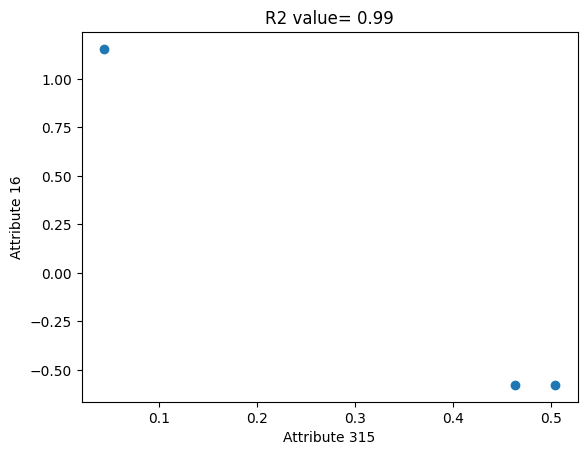

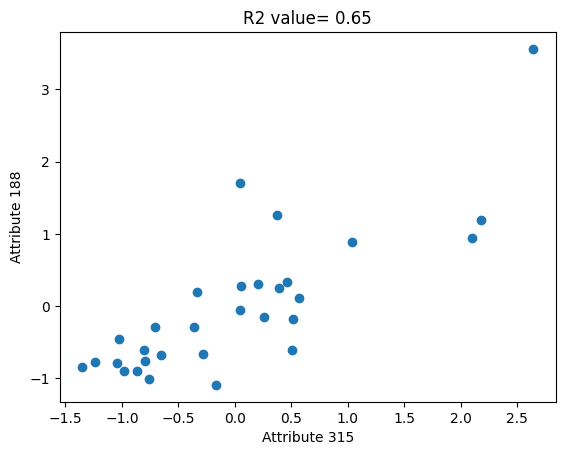

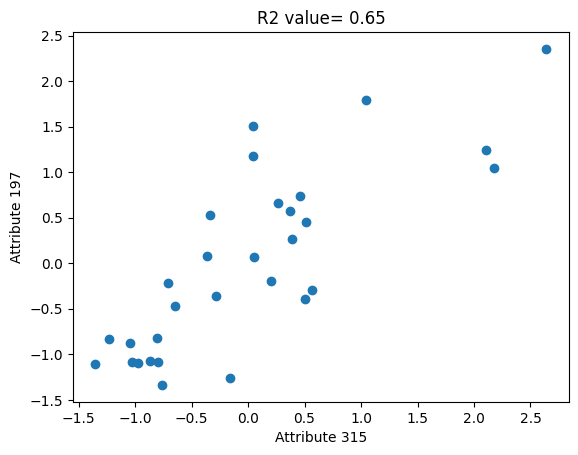

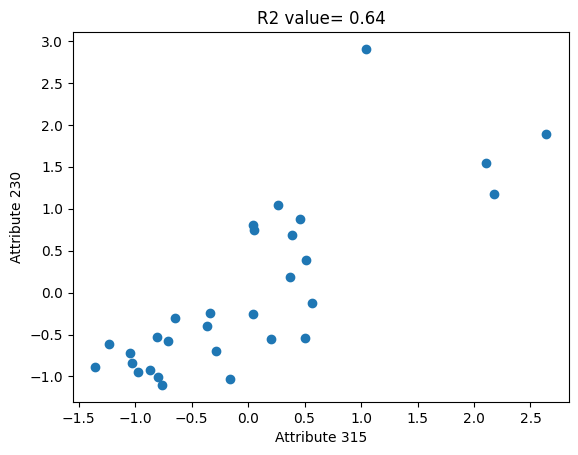

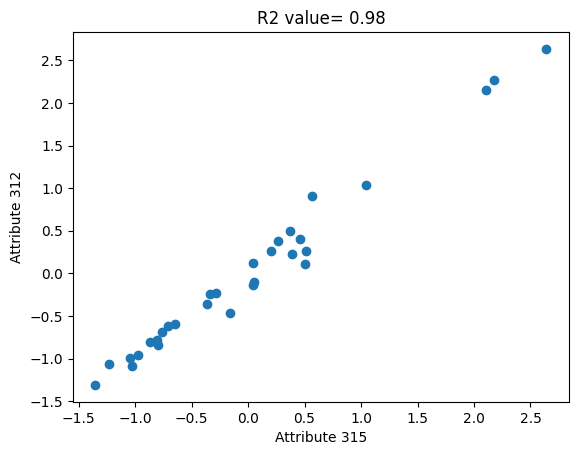

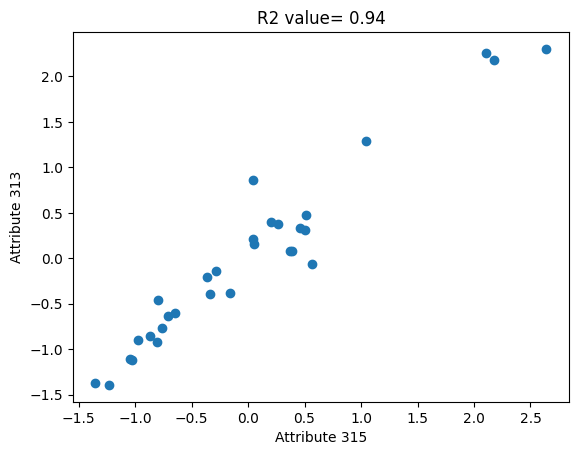

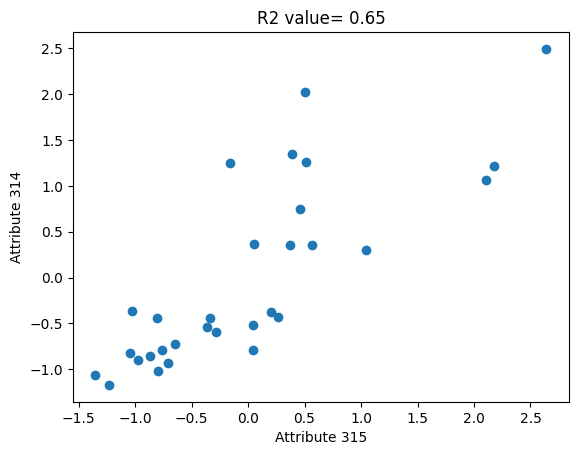

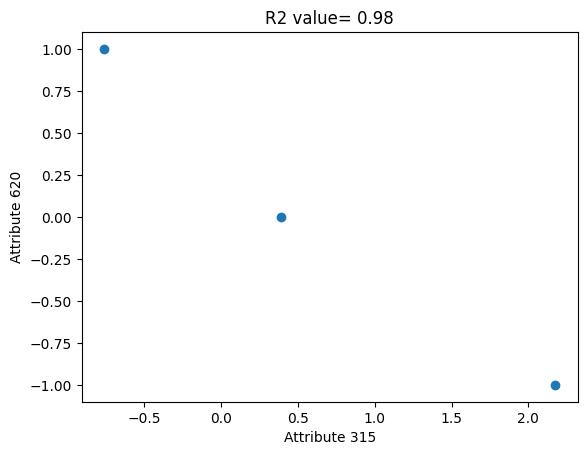

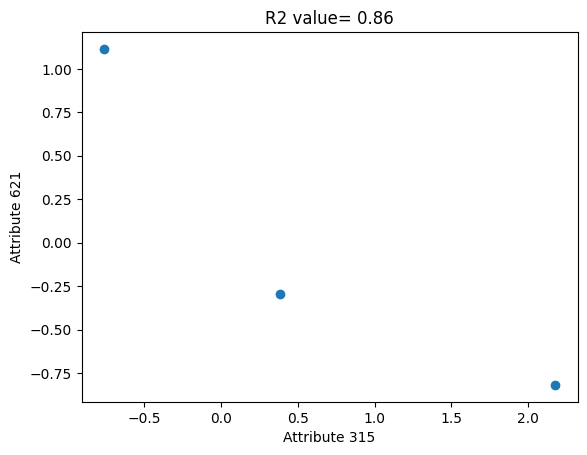

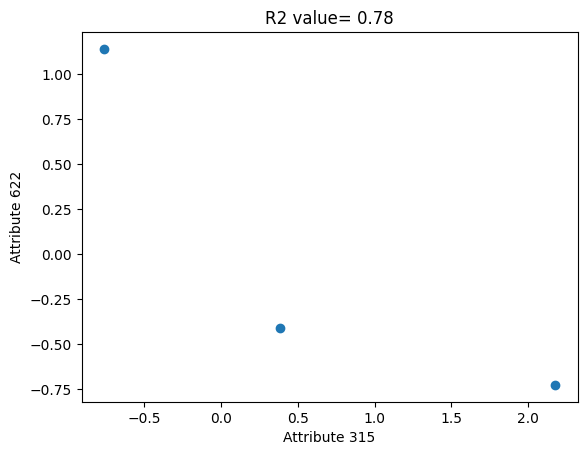

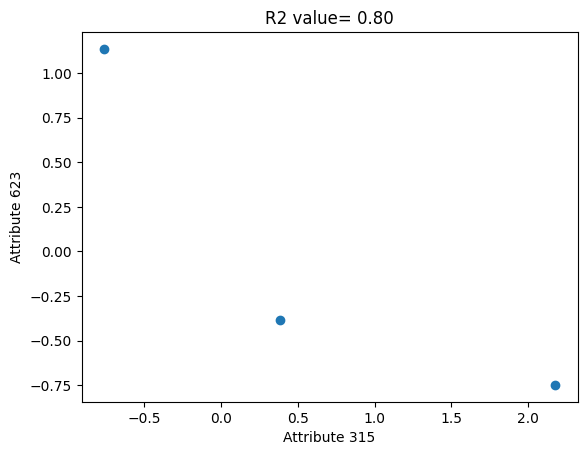

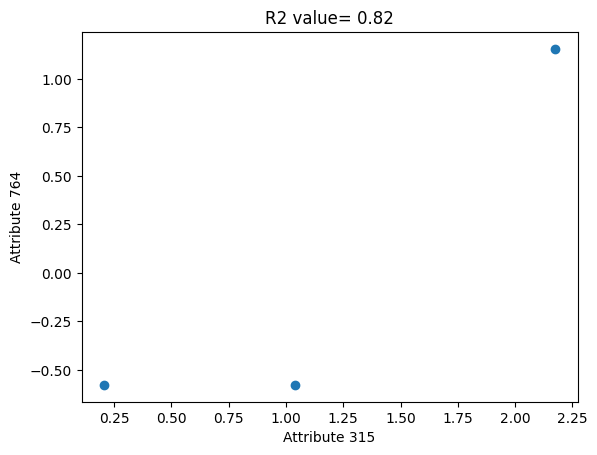

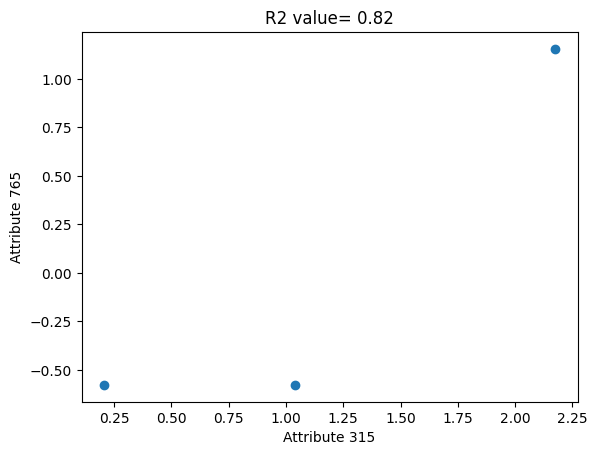

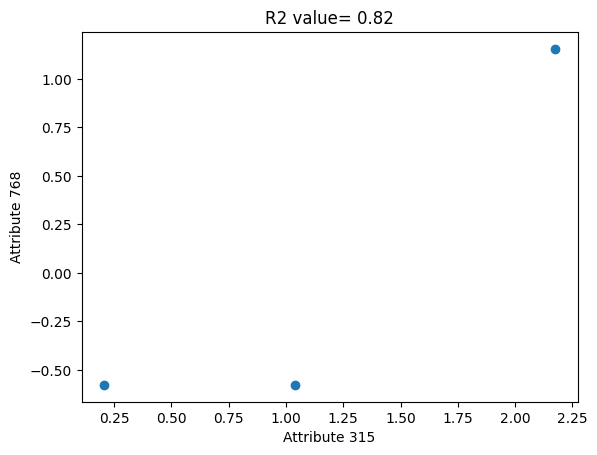

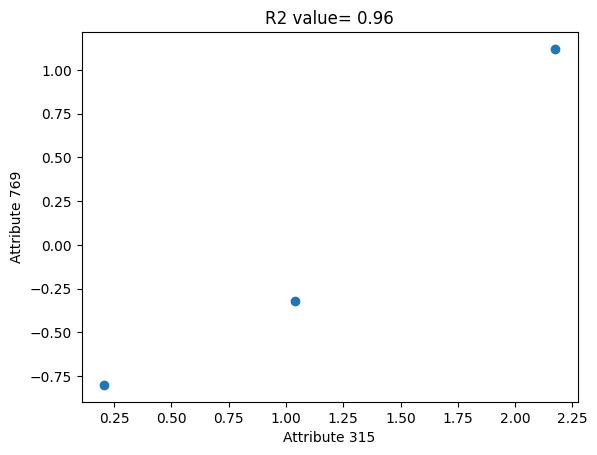

In [65]:
for value in correlated_60_pct_above_numeric_attrs_with_315:
    plt.scatter(df_norm_refined['315'],df_norm_refined[value])
    plt.xlabel('Attribute 315')
    plt.ylabel(f'Attribute {value}')
    plt.title(f'R2 value= {sixty_pct_above_correlated_entries_with_315.loc[value]:.2f}')
    plt.show()

>As we can see attributes with R2 values >0.9 are clearly much more related with attribute 315. So let us only consider those.

In [66]:
correlated_90_pct_above_numeric_attrs_with_315 = []
for i in range(sixty_pct_above_correlated_entries_with_315.index.size):
    if sixty_pct_above_correlated_entries_with_315.iloc[i]>0.9:
        correlated_90_pct_above_numeric_attrs_with_315.append(sixty_pct_above_correlated_entries_with_315.index[i])
correlated_90_pct_above_numeric_attrs_with_315.remove('315')
correlated_90_pct_above_numeric_attrs_with_315

['16', '312', '313', '620', '769']

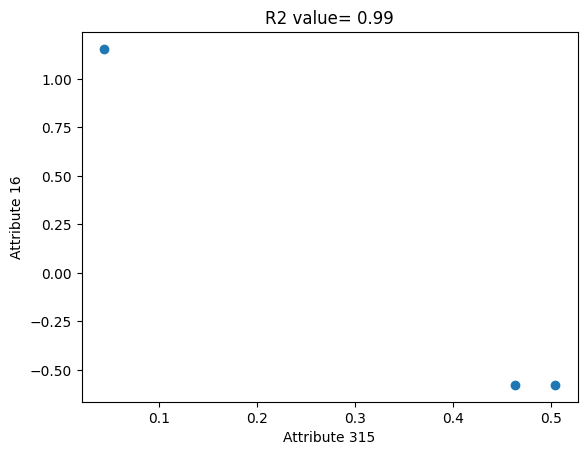

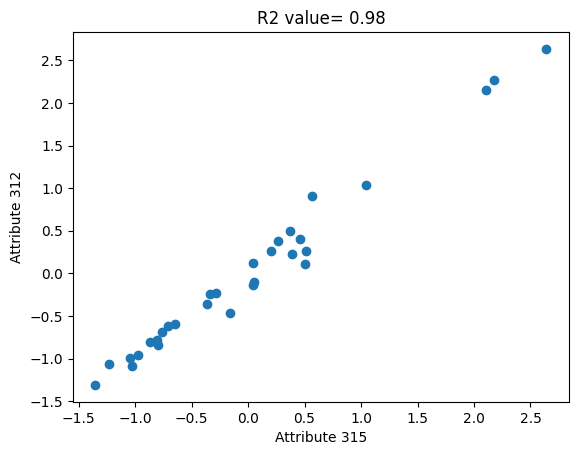

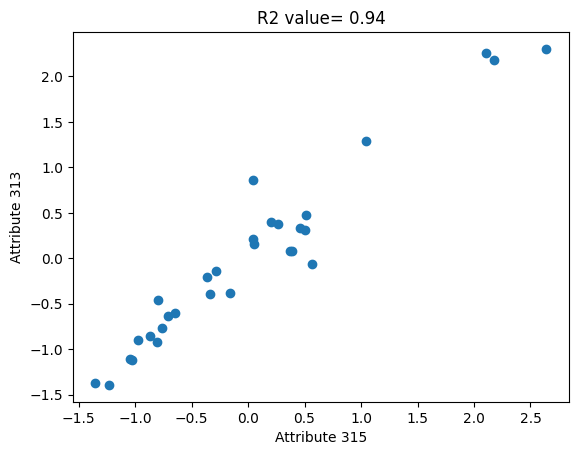

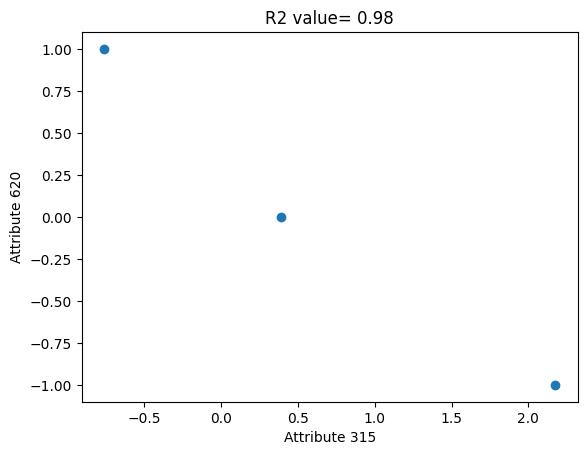

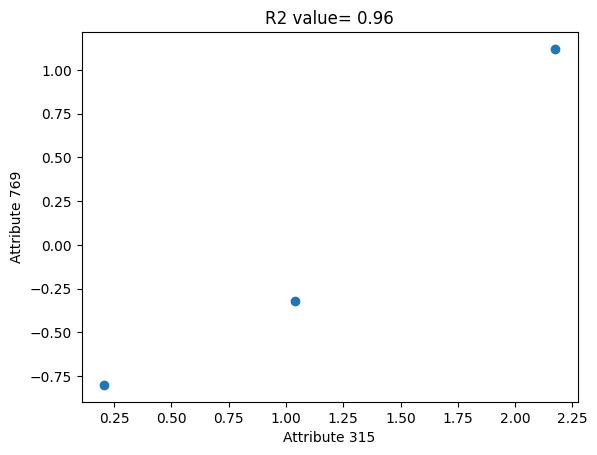

In [67]:
for value in correlated_90_pct_above_numeric_attrs_with_315:
    plt.scatter(df_norm_refined['315'],df_norm_refined[value])
    plt.xlabel('Attribute 315')
    plt.ylabel(f'Attribute {value}')
    plt.title(f'R2 value= {sixty_pct_above_correlated_entries_with_315.loc[value]:.2f}')
    plt.show()

>Since there are hardly any unique values for us to confidently say that attributes 16, 620 and 759. The p-value for our corresponding R^2 is low.

>Hence as per our Correlation analysis attributes 312 and 313 are correlated with attribute 315.

In [68]:
result = pd.DataFrame([[315,312],[315,313]], columns=['Attr_id','Correlated_attrs'])

In [69]:
output = pd.merge(attr,result,on='Attr_id',how='inner')

C:\Users\karti\AppData\Local\Temp\ipykernel_24852\2142331704.py:1: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  output = pd.merge(attr,result,on='Attr_id',how='inner')


In [70]:
output.to_csv('./output.csv',index=False)